In [1]:
# Capital Asset Pricing Model

from scipy import stats
import pandas as pd
import pandas_datareader as web
spy_etf = web.DataReader('SPY','yahoo')

In [2]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,93.675278
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,93.923241
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,93.989357
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,94.386139
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,94.700218


In [3]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2019-09-13')

aapl = web.DataReader('AAPL','yahoo',start,end)

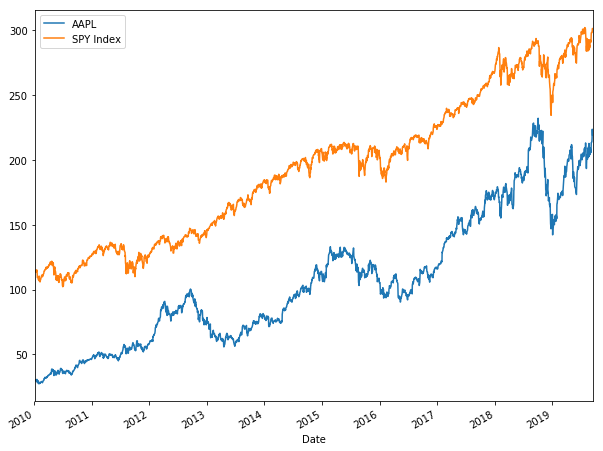

In [4]:
aapl.head()

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [5]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

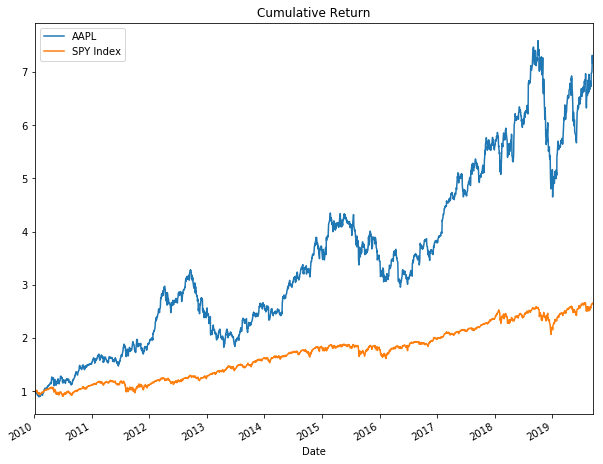

In [6]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

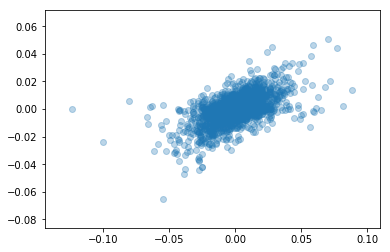

In [7]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3)

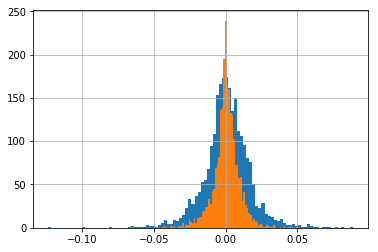

In [8]:
aapl['Daily Return'].hist(bins=100)
spy_etf['Daily Return'].hist(bins=100)

beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [9]:
print(beta)
print(alpha)

0.3401458807800031
0.000124524695792005


In [10]:
import numpy as np
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))
noise
spy_etf['Daily Return'].iloc[1:] + noise
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise,spy_etf['Daily Return'].iloc[1:])
print(beta)
print(alpha)

0.9892726986832587
-8.913730720283314e-06
